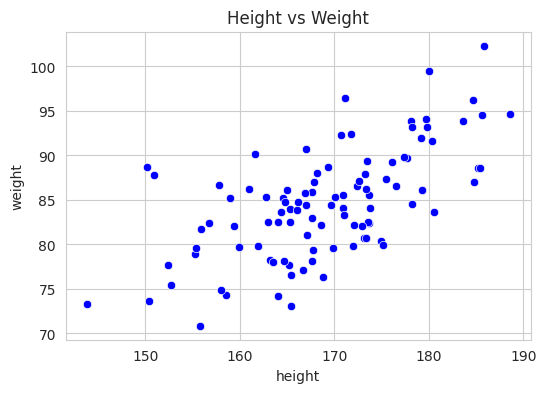

Intercept (β0), Slope (β1): [12.21399777  0.42837142]


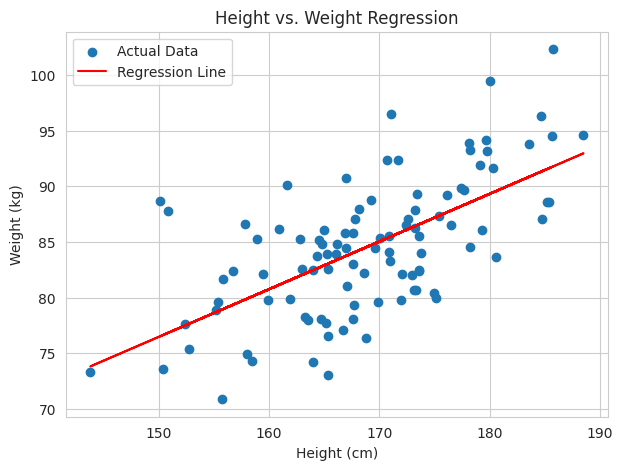

In [ ]:

#  1. Using a dataset of heights vs. weights, fit a simple linear regression to predict weight from height. Plot the regression line.import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
# Generate data
np.random.seed(42)
height = np.random.normal(170, 10, 100)
weight = 0.5 * height + np.random.normal(0, 5, 100)

# Create DataFrame
data = {'height': height, 'weight': weight}
df = pd.DataFrame(data)

# Scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x="height", y="weight", data=df, color="blue")
plt.title("Height vs Weight")
plt.show()

# Reshape height for linear algebra
height = height.reshape(-1, 1)

# Design matrix (add bias term)
height_design = np.c_[np.ones((len(height), 1)), height]

# Normal equation: β = (XᵀX)⁻¹ Xᵀy
eta = np.linalg.inv(height_design.T @ height_design) @ height_design.T @ weight
print("Intercept (β0), Slope (β1):", eta)

# Predictions
weight_pred = eta[0] + eta[1] * height

# Plot regression line
plt.figure(figsize=(7, 5))
plt.scatter(height, weight, label="Actual Data")
plt.plot(height, weight_pred, color="red", label="Regression Line")
plt.title("Height vs. Weight Regression")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.legend()
plt.grid(True)
plt.show()


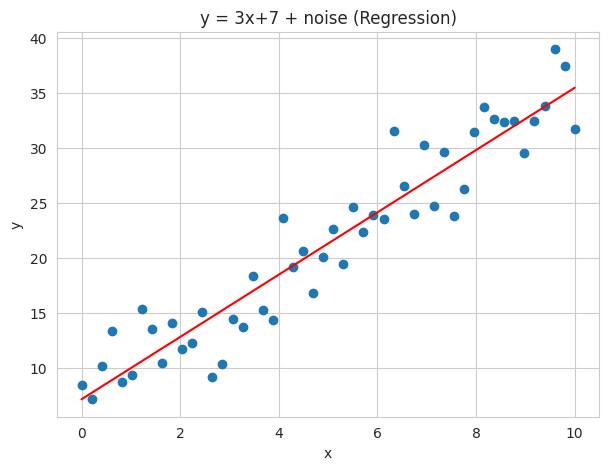

Recovered Coef: 2.826049801524531


In [ ]:
#  2. Generate synthetic data with numpy for y=3x+7+ noise Fit a regression line and recover coefficients.
np.random.seed(42)
x = np.linspace(0, 10, 50)
y = 3 * x + 7 + np.random.normal(0, 3, size=x.size)
x = x.reshape(-1, 1)
x_design = np.c_[np.ones((len(x),1)), x]
 # Normal equation
eta = np.linalg.inv(x_design.T @ x_design) @ x_design.T @ y
# Predictions
pred_y =  eta[0] + eta[1] * x
plt.figure(figsize=(7,5))
plt.scatter(x, y)
plt.plot(x, pred_y, color='red')
plt.title('y = 3x+7 + noise (Regression)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()
print("Recovered Coef:", eta[1])

Recovered Coefficients:
Intercept = 21.369, Slope = 0.369


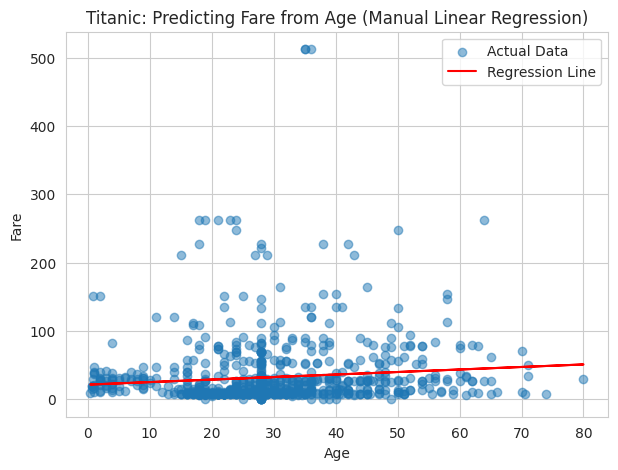

Predicted Fare at age 28 : 31.701730571026015


In [ ]:
# 3. UsetheTitanic dataset to predict Fare from Age using simple linear regression.


# Load Titanic dataset
df = sns.load_dataset('titanic')

# Clean data: replace missing values with median
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())

# Extract features and target
x = df['age'].values.reshape(-1, 1)
y = df['fare'].values

# Build design matrix: add a column of 1s for intercept
X_design = np.c_[np.ones((len(x), 1)), x]

# Apply the normal equation: β = (XᵀX)^(-1) Xᵀy
beta = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y

intercept, slope = beta
print(f"Recovered Coefficients:\nIntercept = {intercept:.3f}, Slope = {slope:.3f}")

# Predictions
y_pred = intercept + slope * x

# Plot
plt.figure(figsize=(7, 5))
plt.scatter(x, y, alpha=0.5, label="Actual Data")
plt.plot(x, y_pred, color="red", label="Regression Line")
plt.title("Titanic: Predicting Fare from Age (Manual Linear Regression)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend()
plt.grid(True)
plt.show()

print("Predicted Fare at age 28 :", (intercept + slope * 28))

Recovered Coefficients:
Intercept = 27.611, Slope = 7.100


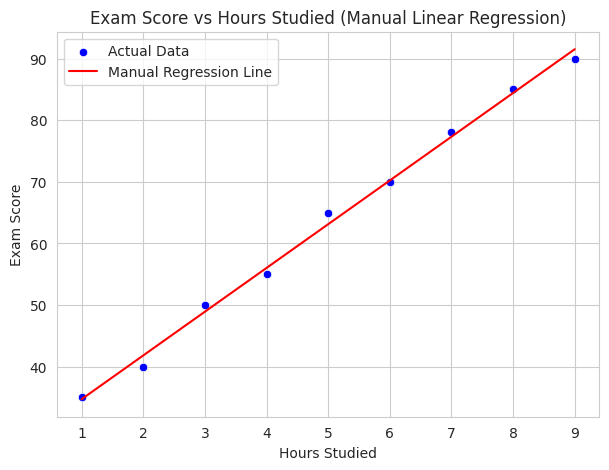

In [ ]:
#  4. For a dataset of hours studied vs. exam score, visualize the regression line with seaborn’s regplot.
# Data
hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
scores = np.array([35, 40, 50, 55, 65, 70, 78, 85, 90])

# Reshape
x = hours.reshape(-1, 1)
y = scores

# Design matrix (add bias term for intercept)
X_design = np.c_[np.ones((len(x), 1)), x]

# Normal Equation: β = (XᵀX)^(-1) Xᵀy
beta = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y
intercept, slope = beta

print(f"Recovered Coefficients:\nIntercept = {intercept:.3f}, Slope = {slope:.3f}")

# Predictions
y_pred = intercept + slope * hours

# Create a DataFrame for seaborn plotting
df = pd.DataFrame({'Hours': hours, 'Scores': scores})

# Visualization with seaborn
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Hours', y='Scores', data=df, color='blue', label='Actual Data')
plt.plot(hours, y_pred, color='red', label='Manual Regression Line')
plt.title("Exam Score vs Hours Studied (Manual Linear Regression)")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.legend()
plt.grid(True)
plt.show()


Male Regression → weight = 0.642 * height + -24.478
Female Regression → weight = 0.486 * height + 2.740


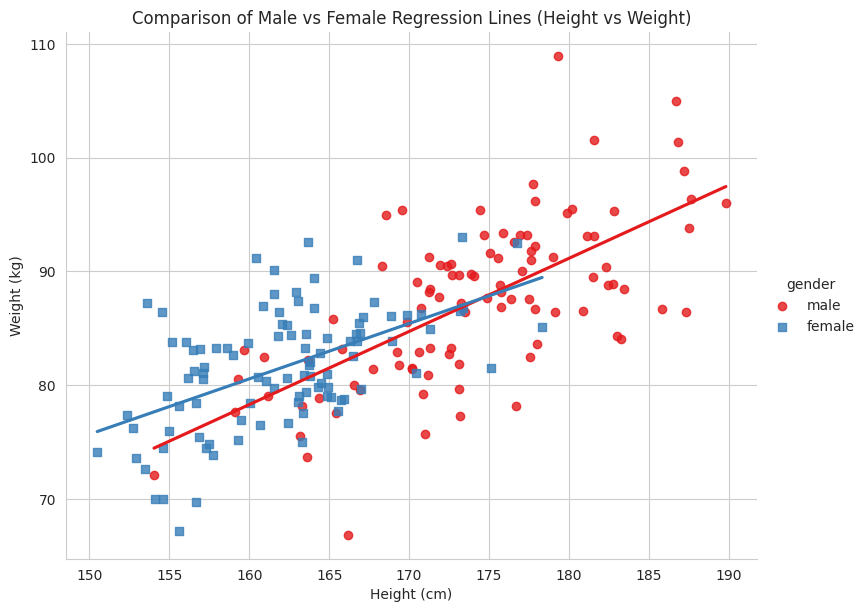

In [ ]:
# 5. Compareregression lines of two groups (e.g., male vs. female height/weight) using seaborn’s lmplot.

# -----------------------------
# 1️ Generate Synthetic Data
# -----------------------------
np.random.seed(42)

# Male heights: μ = 175, σ = 8
male_height = np.random.normal(175, 8, 100)
# Female heights: μ = 162, σ = 6
female_height = np.random.normal(162, 6, 100)

# Weight = 0.5 * height + random noise (μ = 0, σ = 5)
male_weight = 0.5 * male_height + np.random.normal(0, 5, 100)
female_weight = 0.5 * female_height + np.random.normal(0, 5, 100)

# Combine into a single DataFrame
df = pd.DataFrame({
    "height": np.concatenate([male_height, female_height]),
    "weight": np.concatenate([male_weight, female_weight]),
    "gender": ["male"] * 100 + ["female"] * 100
})

# -----------------------------
# 2️ Compute Regression Manually (for reference)
# -----------------------------
def manual_regression(x, y):
    """Compute slope and intercept manually using Normal Equation."""
    x = x.reshape(-1, 1)
    X_design = np.c_[np.ones((len(x), 1)), x]
    beta = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y
    intercept, slope = beta
    return intercept, slope

# Separate groups
male = df[df['gender'] == 'male']
female = df[df['gender'] == 'female']

# Compute coefficients
intercept_m, slope_m = manual_regression(male['height'].values, male['weight'].values)
intercept_f, slope_f = manual_regression(female['height'].values, female['weight'].values)

print(f"Male Regression → weight = {slope_m:.3f} * height + {intercept_m:.3f}")
print(f"Female Regression → weight = {slope_f:.3f} * height + {intercept_f:.3f}")

# -----------------------------
# 3️ Visualization Using Seaborn’s lmplot
# -----------------------------
sns.set_style("whitegrid")
sns.lmplot(x="height", y="weight", hue="gender", data=df, height=6, aspect=1.3,
           markers=["o", "s"], palette="Set1", ci=None)

plt.title("Comparison of Male vs Female Regression Lines (Height vs Weight)")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show()


Recovered Coefficients:
Intercept = 35.175, Slope = -0.060


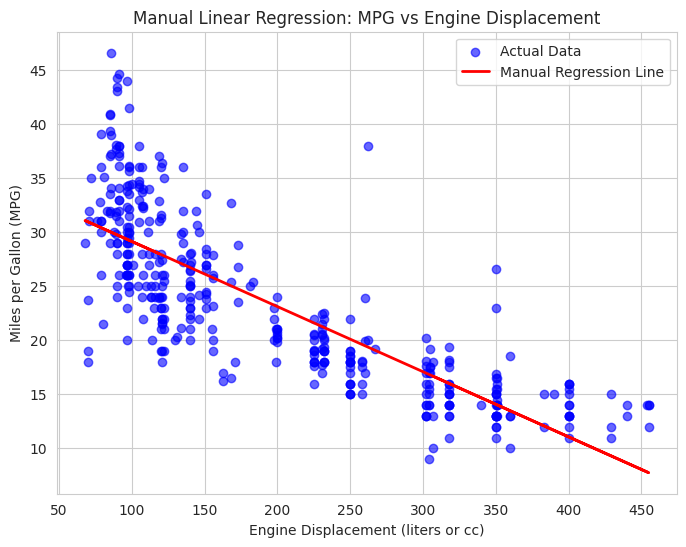

In [ ]:
#6. Fit a regression predicting car mileage (from mpg dataset in seaborn) from engine displacement (cc) using a car dataset.

# ------------------------------
# 1️ Load and clean dataset
# ------------------------------
df = sns.load_dataset('mpg')

# Drop missing values for simplicity
df = df.dropna(subset=['mpg', 'displacement']) if 'displacement' in df.columns else df.dropna(subset=['mpg', 'displ'])

# Some seaborn versions call the column 'displacement', others 'displ'
if 'displacement' in df.columns:
    x = df['displacement'].values
else:
    x = df['displ'].values

y = df['mpg'].values

# ------------------------------
# 2️ Prepare design matrix
# ------------------------------
x = x.reshape(-1, 1)
X_design = np.c_[np.ones((len(x), 1)), x]  # Add intercept column

# ------------------------------
# 3️ Apply the Normal Equation
# β = (XᵀX)^(-1) Xᵀy
# ------------------------------
beta = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y
intercept, slope = beta

print(f"Recovered Coefficients:\nIntercept = {intercept:.3f}, Slope = {slope:.3f}")

# ------------------------------
# 4️ Predict mpg
# ------------------------------
y_pred = intercept + slope * x

# ------------------------------
# 5️ Visualization
# ------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.6, label='Actual Data')
plt.plot(x, y_pred, color='red', linewidth=2, label='Manual Regression Line')
plt.title("Manual Linear Regression: MPG vs Engine Displacement")
plt.xlabel("Engine Displacement (liters or cc)")
plt.ylabel("Miles per Gallon (MPG)")
plt.legend()
plt.grid(True)
plt.show()


Intercept = 4.575, Slope = 4.571


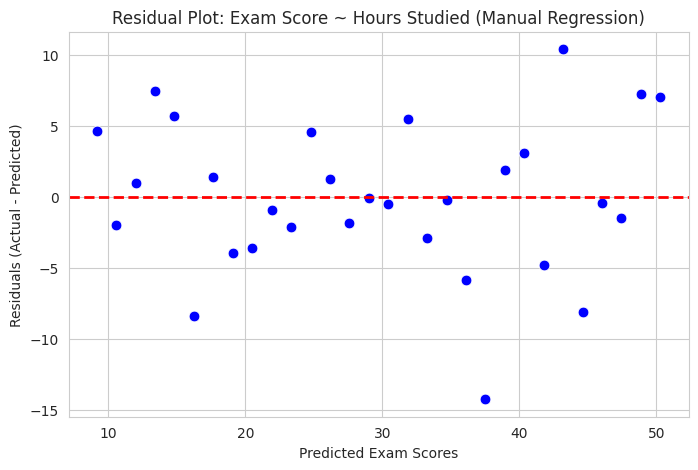

In [ ]:
 #7. Plot the residuals of a simple regression to check assumptions.

# ------------------------------
# 1️ Generate Synthetic Data
# ------------------------------
np.random.seed(0)
hours = np.linspace(1, 10, 30)
scores = 5 * hours + np.random.normal(0, 5, size=30)

# ------------------------------
# 2️ Fit Regression Manually (Normal Equation)
# ------------------------------
x = hours.reshape(-1, 1)
X_design = np.c_[np.ones((len(x), 1)), x]  # Add bias term (intercept)

# β = (XᵀX)⁻¹ Xᵀy
beta = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ scores
intercept, slope = beta
print(f"Intercept = {intercept:.3f}, Slope = {slope:.3f}")

# ------------------------------
# 3️ Predictions & Residuals
# ------------------------------
y_pred = intercept + slope * hours
residuals = scores - y_pred  # Actual - Predicted

# ------------------------------
# 4️ Plot Residuals
# ------------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals, color='blue', s=60)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residual Plot: Exam Score ~ Hours Studied (Manual Regression)")
plt.xlabel("Predicted Exam Scores")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()




In [ ]:
# 8. Performregression on advertising dataset (TV spend vs. sales) and interpret
#  slope/intercept.
#  # Example synthetic advertising dataset
data = {
 "TV": [10, 20, 30, 40, 50, 60, 70, 80],
 "Sales": [7, 9, 13, 15, 18, 20, 24, 27]
}
df=pd.DataFrame(data)
X = df["TV"].values
Y = df["Sales"].values
 # Add column of ones for intercept (β0)
X_b = np.c_[np.ones((len(X),1)), X]
# Calculate coefficients using Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
intercept, slope = theta_best
print("Intercept:", intercept)
print("Slope:", slope)


Intercept: 3.821428571428572
Slope: 0.2845238095238094


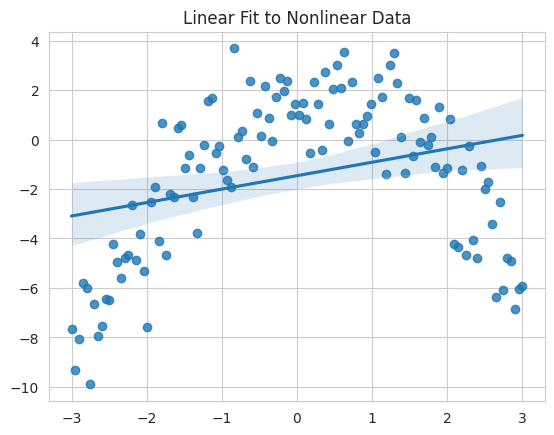

In [ ]:
#  9. Generate synthetic non-linear data and fit a regression line. Show visually why a linear model fails.
np.random.seed(0)
x = np.linspace(-3, 3, 120)
true_y = 2 + 0.5*x - 1.2*(x**2)
y = true_y + np.random.normal(0, 1.5, size=x.size)
sns.regplot(x=x, y=y)
plt.title("Linear Fit to Nonlinear Data")
plt.grid(True)
plt.show()

Intercept = 7.193, Slope = 2.826


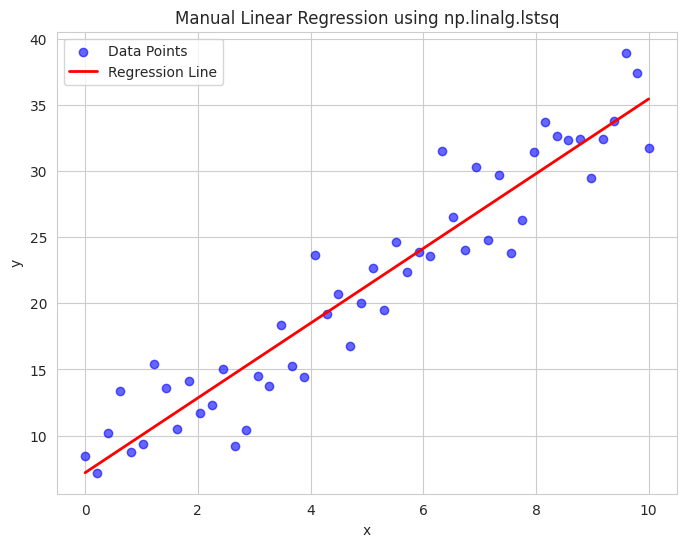

In [ ]:

#  10. Implement the simple regression formula manually with numpy.linalg.lstsq
# ------------------------------
# 1️ Generate Synthetic Data
# ------------------------------
np.random.seed(42)
x = np.linspace(0, 10, 50)
y = 3 * x + 7 + np.random.normal(0, 3, size=x.size)  # true model: y = 3x + 7 + noise

# ------------------------------
# 2️ Prepare Design Matrix
# ------------------------------
X_design = np.c_[np.ones((len(x), 1)), x]  # column of ones + x

# ------------------------------
# 3️ Solve Using Least Squares
# ------------------------------
# beta = [intercept, slope]
beta, residuals, rank, s = np.linalg.lstsq(X_design, y, rcond=None)
intercept, slope = beta
print(f"Intercept = {intercept:.3f}, Slope = {slope:.3f}")

# ------------------------------
# 4️ Predictions
# ------------------------------
y_pred = intercept + slope * x

# ------------------------------
# 5️ Plot Data + Regression Line
# ------------------------------
plt.figure(figsize=(8,6))
plt.scatter(x, y, color='blue', alpha=0.6, label='Data Points')
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title("Manual Linear Regression using np.linalg.lstsq")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#  11. Using the Titanic dataset, predict Fare based on Pclass, Age, and SibSp.


titanic = sns.load_dataset('titanic').dropna(subset=['fare','age','pclass','sibsp'])
# Features: pclass (already numeric), age, sibsp
X = titanic[['pclass','age','sibsp']].values
Y = titanic['fare'].values

# Add intercept
X_b = np.c_[np.ones((len(X),1)), X]
theta = np.linalg.inv(X_b.T@X_b) @ X_b.T @ Y
print("Coefficients:", np.round(theta,4))

# R^2
y_pred = X_b @ theta
r2 = 1 - np.sum((Y-y_pred)**2)/np.sum((Y-Y.mean())**2)
print(f"R²: {r2:.4f}")

Coefficients: [121.8853 -37.3874  -0.2725   8.8276]
R²: 0.3425


In [ ]:
#  12. Fit a regression predicting house price based on sqft, bedrooms, and bathrooms (synthetic dataset if needed).


np.random.seed(42)
sqft = np.random.normal(2000, 500, 100)
bedrooms = np.random.randint(2,6,100)
bathrooms = np.random.randint(1,4,100)

# Assume price = 50 * sqft + 10000*bedrooms + 5000*bathrooms + noise
price = 50*sqft + 10000*bedrooms + 5000*bathrooms + np.random.normal(0,20000,100)

df = pd.DataFrame({'sqft':sqft,'bedrooms':bedrooms,'bathrooms':bathrooms,'price':price})
X = df[['sqft','bedrooms','bathrooms']].values
Y = df['price'].values
X_b = np.c_[np.ones((len(X),1)), X]

theta = np.linalg.inv(X_b.T@X_b) @ X_b.T @ Y
print("Coefficients:", np.round(theta,3))

# Quick R2
y_pred = X_b @ theta
r2 = 1 - np.sum((Y-y_pred)**2)/np.sum((Y-Y.mean())**2)
print("R²:", round(r2,3))

Coefficients: [-3850.433    56.174  9421.922  3814.504]
R²: 0.665


In [ ]:
#  13. Compare regression coefficients before and after standardizing features with Standard Scaler using the Titanic dataset in problem 11 features above.
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import pandas as pd

# Load and clean
titanic = sns.load_dataset('titanic').dropna(subset=['fare','age','pclass','sibsp'])
X = titanic[['pclass','age','sibsp']].values
Y = titanic['fare'].values

# Without scaling
X_b = np.c_[np.ones((len(X),1)), X]
theta_unscaled = np.linalg.inv(X_b.T@X_b) @ X_b.T @ Y

# With standardization (no intercept on scaled X; we still add intercept later)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Xb_scaled = np.c_[np.ones((len(X_scaled),1)), X_scaled]
theta_scaled = np.linalg.inv(Xb_scaled.T@Xb_scaled) @ Xb_scaled.T @ Y

print("Coefficients unscaled:", np.round(theta_unscaled,4))
print("Coefficients scaled:", np.round(theta_scaled,4))

Coefficients unscaled: [121.8853 -37.3874  -0.2725   8.8276]
Coefficients scaled: [ 34.6945 -31.3181  -3.955    8.202 ]


In [ ]:
#  14. Use a dataset of student performance to predict exam scores based on hours studied, sleep, and class attendance.
import numpy as np
import pandas as pd

np.random.seed(1)
n = 50
hours = np.random.randint(1,11,n)
sleep = np.random.randint(5,10,n)
attendance = np.random.randint(60,101,n)
# Score = 5*hours + 3*sleep + 0.5*attendance + noise(sd=5)
score = 5*hours + 3*sleep + 0.5*attendance + np.random.normal(0,5,n)

df = pd.DataFrame({'hours':hours,'sleep':sleep,'attendance':attendance,'score':score})
X = df[['hours','sleep','attendance']].values
Y = df['score'].values
Xb = np.c_[np.ones((len(X),1)), X]
theta = np.linalg.inv(Xb.T@Xb) @ Xb.T @ Y
print('Coefficients:', np.round(theta,3))

# R2
y_pred = Xb @ theta
r2 = 1 - np.sum((Y-y_pred)**2)/np.sum((Y-Y.mean())**2)
print('R²:', round(r2,3))

Coefficients: [1.074 5.266 2.661 0.511]
R²: 0.92


In [ ]:
#  15. Fit regression on car dataset predicting mpg using weight, horsepower, displacement.
import seaborn as sns
import numpy as np
import pandas as pd

cars = sns.load_dataset('mpg').dropna(subset=['mpg','weight','horsepower','displacement'])
# horsepower in dataset may be string; ensure numeric
cars['horsepower'] = pd.to_numeric(cars['horsepower'], errors='coerce')
cars = cars.dropna(subset=['horsepower'])
X = cars[['weight','horsepower','displacement']].values
Y = cars['mpg'].values
Xb = np.c_[np.ones((len(X),1)), X]
theta = np.linalg.inv(Xb.T@Xb) @ Xb.T @ Y
print("Coefficient:", np.round(theta,4))

# R2
y_pred = Xb @ theta
r2 = 1 - np.sum((Y-y_pred)**2)/np.sum((Y-Y.mean())**2)
print('R²:', round(r2,3))

Coefficient: [ 4.48559e+01 -5.40000e-03 -4.17000e-02 -5.80000e-03]
R²: 0.707


In [ ]:
#16. Perform regression on insurance dataset predicting charges using age, bmi, children.
import numpy as np
import pandas as pd

age = np.random.randint(20, 60, 100)
bmi = np.random.normal(25, 5, 100)
children = np.random.randint(0, 4, 100)
epsilon = np.random.normal(0, 1000, 100)
charges = 250*age + 300*bmi + 500*children + epsilon

df16 = pd.DataFrame({'age':age,'bmi':bmi,'children':children,'charges':charges})

X = df16[['age', 'bmi', 'children']].values
Y = df16['charges'].values

# Add intercept term to X
X_b = np.c_[np.ones((len(X), 1)), X]

# Calculate coefficients using the Normal Equation
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ Y

# Print coefficients and intercept
print("Coefficients:", np.round(theta[1:], 3))
print("Intercept:", np.round(theta[0], 3))

Coefficients: [245.522 297.309 563.395]
Intercept: 260.982


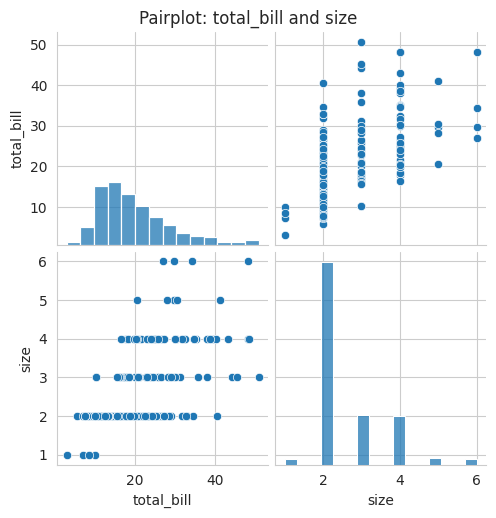

Coefficients (intercept, size, time_code): [3.9482 5.4817 2.4284]
   Actual  Predicted
0   16.99  17.339965
1   10.34  22.821642
2   21.01  22.821642
3   23.68  17.339965
4   24.59  28.303319


In [ ]:
#17. Visualize pairplots of predictors and fit a regression model on seaborn’s tips dataset to predict total_bill using party size and time.
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
tips = sns.load_dataset('tips').dropna(subset=['total_bill','size','time'])
# Pairplot of predictors (size and maybe day/time encoded) but for simplicity pairplot numeric
sns.pairplot(tips[['total_bill','size']])
plt.suptitle('Pairplot: total_bill and size', y=1.02)
plt.show()

# Fit regression total_bill ~ size (and encode time (Dinner=1 Lunch=0))
tips['time_code'] = (tips['time']=='Dinner').astype(int)
X = tips[['size','time_code']].values
Y = tips['total_bill'].values
Xb = np.c_[np.ones((len(X),1)), X]
theta = np.linalg.inv(Xb.T@Xb) @ Xb.T @ Y
print("Coefficients (intercept, size, time_code):", np.round(theta,4))

# Compare actual vs predicted
y_pred = Xb @ theta
res_df = pd.DataFrame({'Actual':Y,'Predicted':y_pred})
print(res_df.head())